### 팔요한 라이브러리 호출

In [42]:
import pandas as pd
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import numpy as np
import platform
# 정규식
import re

### 폰트 지정

In [43]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    plt.rcParams['axes.unicode_minus'] = False

### 데이터 호출

In [44]:
df_usage = pd.read_csv('전력 사용량 14차.csv')
df_usage = df_usage.drop(columns=['Unnamed: 0'])
df_kospi = pd.read_csv('코스피 2차.csv')
df_kospi = df_kospi.drop(columns=['Unnamed: 0'])

In [55]:
df_usage_test = df_usage.groupby(['년월', '연도', '시도', '월']).sum()
df_usage_test.reset_index()
df_usage_test = df_usage_test.groupby(['연도', '월']).sum()
df_usage_test = df_usage_test.reset_index()
df_usage_test

,연도,월,사용량
0,2010,1,39696747
1,2010,2,37208030
2,2010,3,35554125
3,2010,4,35968361
4,2010,5,33809235
...,...,...,...
139,2021,8,48929956
140,2021,9,44818884
141,2021,10,41838223
142,2021,11,42829617


In [93]:
def usage_plt(x_label, y_label):
    # X축 : 기간, Y축 : 사용량

    # 그래프 크기 설정
    plt.figure(figsize=(29, 6))

    # 데이터프레임을 이용하여 그래프 그리기
    plt.plot(x_label, y_label, marker='o', markersize=2)

    # y축에 그리드 추가
    plt.grid(axis='y', linestyle='-', alpha=0.5)

    # 그래프 범례를 그래프 밖에 위치
    plt.legend('사용량', loc='center left', bbox_to_anchor=(1, 0.5))

    # 그래프 제목 설정
    plt.title('2010~2021 전력 사용량')

    # x축 레이블 설정
    plt.xlabel('사용 월')

    plt.grid(axis='x', linestyle='-', alpha=0.4)

    # x축 값 조절
    # xticks = df_usage_test[['연도','월']][::6]

    xticks = x_label[::12]
    plt.xticks(xticks)

    # y축 레이블 설정
    plt.ylabel('전력 사용량')

    # x, y축 범위 자동으로 설정
    plt.autoscale(axis='x', tight=True)
    plt.autoscale(axis='y', tight=True)

    # 그래프 출력
    plt.show()

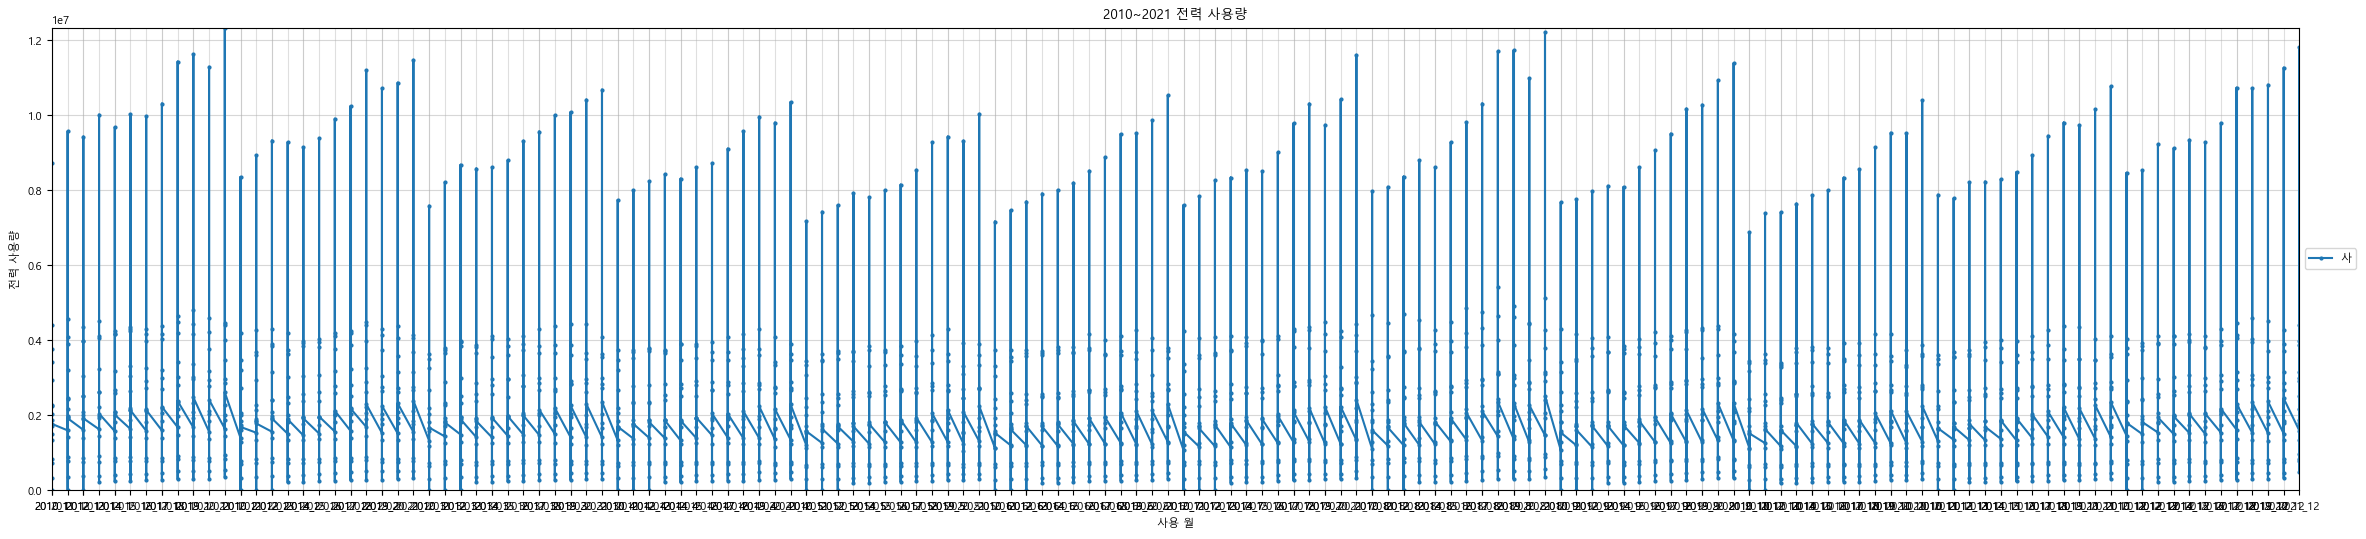

In [94]:
usage_plt(df_usage['년월'], df_usage['사용량'])

In [82]:
def kospi_plt(x_label, y_label):
    # X축 : 기간, Y축 : 코스피 평균


    # 그래프 크기 설정
    plt.figure(figsize=(29, 6))

    # 데이터프레임을 이용하여 그래프 그리기
    plt.plot(x_label, y_label, marker='o', markersize=2)

    # y축에 그리드 추가
    plt.grid(axis='y', linestyle='-', alpha=0.5)

    # 그래프 범례를 그래프 밖에 위치
    plt.legend('사용량', loc='center left', bbox_to_anchor=(1, 0.5))

    # 그래프 제목 설정
    plt.title('2010~2021 월별 코스피')

    # x축 레이블 설정
    plt.xlabel('사용 월')

    plt.grid(axis='x', linestyle='-', alpha=0.4)

    # x축 값 조절
    xticks = x_label[::12]
    plt.xticks(xticks)

    # y축 레이블 설정
    plt.ylabel('코스피')

    # x, y축 범위 자동으로 설정
    plt.autoscale(axis='x', tight=True)
    plt.autoscale(axis='y', tight=True)

    # 그래프 출력
    plt.show()

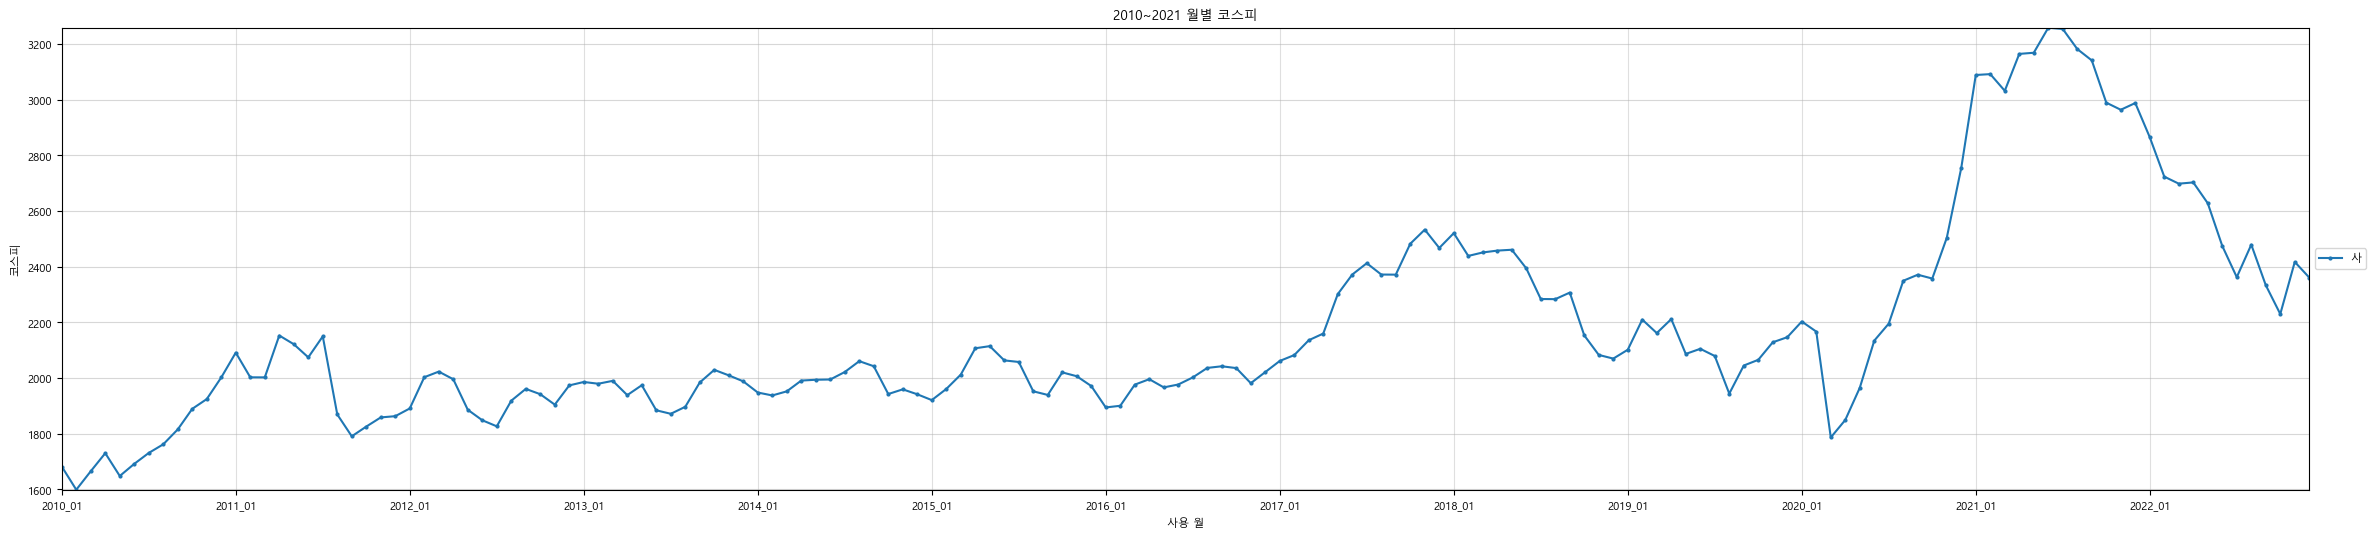

In [86]:
kospi_plt(df_kospi['년월'], df_kospi['코스피 평균'])